Epoch 1/3
129/129 [==============================] - 44s 334ms/step - loss: 2.4861 - accuracy: 0.2867 - val_loss: 1.4530 - val_accuracy: 0.6294
Epoch 2/3
129/129 [==============================] - 43s 337ms/step - loss: 0.7636 - accuracy: 0.7902 - val_loss: 1.1171 - val_accuracy: 0.7203
Epoch 3/3
129/129 [==============================] - 46s 361ms/step - loss: 0.2516 - accuracy: 0.9355 - val_loss: 1.2295 - val_accuracy: 0.7273
45/45 - 13s - loss: 0.1855 - accuracy: 0.9545
Accuracy: 
0.9545454382896423
enter index number to test 10
G


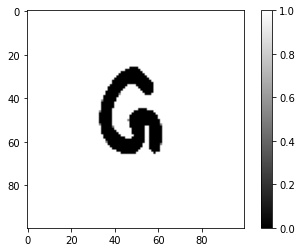

In [14]:
import matplotlib.pyplot as plt
import numpy as np 
import PIL #Python Imaging Library
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import cv2
import matplotlib.pyplot as plt
 

#importing dataset
DATASET = r"C:\Users\shann\Documents\English\Hnd\Img" #here is where you put the directory
CATEGORIES = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

for category in CATEGORIES:
    path = os.path.join(DATASET, category) #path to letters
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#convert to grayscale(rgb 3 times size)
        break
    break
 
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))  

#create training dataset function
training_data = []
img_array = []
new_array = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATASET, category) #path to letters
        class_num = CATEGORIES.index(category)#have the outputs be a numerical value
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#convert to grayscale(rgb 3 times size)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #resize operation
                training_data.append([new_array,class_num])#add to end of list training_data
            except Exception as e:
                    print(e)
                    pass
create_training_data()

#need to shuffle
import random
random.shuffle(training_data)


X = []#feature(The features are the descriptive attributes)
Y = []#label(label is what you're attempting to predict or forecast.)

#btw training_data is two dimensional
for features, label in training_data:
    X.append(features)
    Y.append(label)
    #np.array((Y,label),dtype=object)

#can't pass list to neural network, need convert to numpy array
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)#-1 amt of features is catch all(any number), 1 means greyscale
Y = np.array(Y)

#we need to normalize data(scale it, max 225, min 0. divide 255)
# Normalize pixel values to be between 0 and 1
X = X/255.0

#Sequences are one of the principal built-in data types besides numerics, mappings, 
#files, instances and exceptions. Python provides for six sequence
model =  Sequential()

model.add(   Conv2D(126,(3,3),input_shape = X.shape[1:])   )#add convulutional layer
model.add(Activation("relu"))#add activation layer(linear or non linear equations which process the output of a Neural Network’s neuron and bound it into a limited range of values)
model.add(MaxPooling2D(pool_size = (2,2)))#add pooling layer

model.add(  Conv2D(126,(3,3)  ))#add convulutional layer
model.add(Activation("relu"))#add activation layer
model.add(MaxPooling2D(pool_size = (2,2)))#add pooling layer

#now we have 2x64 covulutional neural network
model.add(Flatten())#need flatten because dense needs one dimesnioal array

model.add(Dense(126))#add dense layer
model.add(Activation('relu'))

#A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.
model.add(Dense(26))
model.add(Activation('sigmoid'))#softmax

#adam and categorical didn't work **LOOK IT UP LATER
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#batch size is how many images at a time we want to pass(usally 20s to 200)
#epoch is how many times we test it(dont want to overtest! but you could raise epoch number for higher accuracy)
model.fit(X,Y,batch_size = 10, epochs = 3, validation_split = 0.1 )

#printing the accuracy(not needed because it already shows but this is just to show how to do it)
test_loss, test_acc = model.evaluate(X, Y, verbose=2)
print("Accuracy: ")
print( test_acc)

#testing the model
num = int(input("enter index number to test "))#the index you want to test
predictions = model.predict(X) 
print(CATEGORIES[np.argmax(predictions[num])])
plt.figure
plt.imshow(X[num],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()